In [1]:
import pandas as pd
#
#pd.set_option("display.max_rows", None)
#pd.set_option("display.max_columns", None)
#pd.set_option("display.width", None)
#pd.set_option("display.max_colwidth", None)

df = pd.read_csv("Cleaning_data_merged.csv")



In [2]:

df.shape

(11933, 98)

In [3]:
df.columns.to_list()

['SEQN',
 'SDDSRVYR',
 'RIDSTATR',
 'RIAGENDR',
 'RIDAGEYR',
 'RIDAGEMN',
 'RIDRETH1',
 'RIDRETH3',
 'RIDEXMON',
 'RIDEXAGM',
 'DMQMILIZ',
 'DMDBORN4',
 'DMDYRUSR',
 'DMDEDUC2',
 'DMDMARTZ',
 'RIDEXPRG',
 'DMDHHSIZ',
 'DMDHRGND',
 'DMDHRAGZ',
 'DMDHREDZ',
 'DMDHRMAZ',
 'DMDHSEDZ',
 'WTINT2YR',
 'WTMEC2YR',
 'SDMVSTRA',
 'SDMVPSU',
 'INDFMPIR',
 'DIQ010',
 'DID040',
 'DIQ160',
 'DIQ180',
 'DIQ050',
 'DID060',
 'DIQ060U',
 'DIQ070',
 'WTPH2YR',
 'LBXGH',
 'WTSAF2YR',
 'LBXGLU',
 'LBDGLUSI',
 'HIQ011',
 'HIQ032A',
 'HIQ032B',
 'HIQ032C',
 'HIQ032D',
 'HIQ032E',
 'HIQ032F',
 'HIQ032H',
 'HIQ032I',
 'HIQ210',
 'HUQ010',
 'HUQ030',
 'HUQ042',
 'HUQ055',
 'HUQ090',
 'INDFMMPI',
 'INDFMMPC',
 'INQ300',
 'IND310',
 'URXPREG',
 'BMDSTATS',
 'BMXWT',
 'BMIWT',
 'BMXRECUM',
 'BMIRECUM',
 'BMXHEAD',
 'BMIHEAD',
 'BMXHT',
 'BMIHT',
 'BMXBMI',
 'BMDBMIC',
 'BMXLEG',
 'BMILEG',
 'BMXARML',
 'BMIARML',
 'BMXARMC',
 'BMIARMC',
 'BMXWAIST',
 'BMIWAIST',
 'BMXHIP',
 'BMIHIP',
 'PAD790Q',
 'PAD790U',
 'PAD

In [4]:
#df["bio_diabetes"] = df["LBXGH"].notna() & df["LBXGH"].ge(6.5)
#df["bio_diabetes"].value_counts()

#LBXGH = HbA1c level 

In [5]:
#df["LBXGH"].value_counts(dropna=False).sort_index(ascending=True)
#df = df[df["RIDAGEYR"] >= 20]

#df["bio_diabetes"].value_counts()
#(df["bio_diabetes"] == True).sum()

## Data cleaning (continued)

Below: remove duplicates, handle missing values, and recode NHANES "Refused" / "Don't know" where appropriate.

In [6]:
# 1. Duplicate check (SEQN should be unique per respondent)
n_before = len(df)
dup_mask = df.duplicated(subset=["SEQN"], keep="first")
n_dups = dup_mask.sum()
if n_dups > 0:
    df = df[~dup_mask]
    print(f"Dropped {n_dups} duplicate SEQN. Rows: {n_before} -> {len(df)}")
else:
    print("No duplicate SEQN found.")

No duplicate SEQN found.


In [7]:
df.columns.to_list()

['SEQN',
 'SDDSRVYR',
 'RIDSTATR',
 'RIAGENDR',
 'RIDAGEYR',
 'RIDAGEMN',
 'RIDRETH1',
 'RIDRETH3',
 'RIDEXMON',
 'RIDEXAGM',
 'DMQMILIZ',
 'DMDBORN4',
 'DMDYRUSR',
 'DMDEDUC2',
 'DMDMARTZ',
 'RIDEXPRG',
 'DMDHHSIZ',
 'DMDHRGND',
 'DMDHRAGZ',
 'DMDHREDZ',
 'DMDHRMAZ',
 'DMDHSEDZ',
 'WTINT2YR',
 'WTMEC2YR',
 'SDMVSTRA',
 'SDMVPSU',
 'INDFMPIR',
 'DIQ010',
 'DID040',
 'DIQ160',
 'DIQ180',
 'DIQ050',
 'DID060',
 'DIQ060U',
 'DIQ070',
 'WTPH2YR',
 'LBXGH',
 'WTSAF2YR',
 'LBXGLU',
 'LBDGLUSI',
 'HIQ011',
 'HIQ032A',
 'HIQ032B',
 'HIQ032C',
 'HIQ032D',
 'HIQ032E',
 'HIQ032F',
 'HIQ032H',
 'HIQ032I',
 'HIQ210',
 'HUQ010',
 'HUQ030',
 'HUQ042',
 'HUQ055',
 'HUQ090',
 'INDFMMPI',
 'INDFMMPC',
 'INQ300',
 'IND310',
 'URXPREG',
 'BMDSTATS',
 'BMXWT',
 'BMIWT',
 'BMXRECUM',
 'BMIRECUM',
 'BMXHEAD',
 'BMIHEAD',
 'BMXHT',
 'BMIHT',
 'BMXBMI',
 'BMDBMIC',
 'BMXLEG',
 'BMILEG',
 'BMXARML',
 'BMIARML',
 'BMXARMC',
 'BMIARMC',
 'BMXWAIST',
 'BMIWAIST',
 'BMXHIP',
 'BMIHIP',
 'PAD790Q',
 'PAD790U',
 'PAD

In [8]:
# 2. Missing value summary and drop high-missing columns
missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df)) * 100
missing_agg = pd.DataFrame({"count": missing_count, "pct": missing_pct}).sort_values("count", ascending=False)
missing_agg = missing_agg[missing_agg["count"] > 0]

print("Columns with missing values (after filters):")
print(missing_agg.to_string())
print()

# Drop columns with more than 50% missing (optional; adjust threshold as needed)
THRESHOLD_PCT = 50
cols_to_drop = missing_agg[missing_agg["pct"] > THRESHOLD_PCT].index.tolist()
if cols_to_drop:
    df = df.drop(columns=cols_to_drop, errors="ignore")
    print(f"Dropped {len(cols_to_drop)} columns with >{THRESHOLD_PCT}% missing: {cols_to_drop}")
else:
    print(f"No columns with >{THRESHOLD_PCT}% missing.")
print(f"Shape after dropping high-missing columns: {df.shape}")

Columns with missing values (after filters):
          count         pct
BMIHEAD   11933  100.000000
BMIRECUM  11915   99.849158
BMXHEAD   11863   99.413391
HIQ032E   11839   99.212268
BMIHT     11799   98.877064
BMIARML   11733   98.323976
HIQ032C   11732   98.315595
BMIARMC   11728   98.282075
DIQ060U   11601   97.217799
DID060    11590   97.125618
BMIWT     11588   97.108858
BMIWAIST  11586   97.092098
BMIHIP    11572   96.974776
HIQ032F   11563   96.899355
RIDAGEMN  11556   96.840694
BMILEG    11537   96.681472
HIQ032I   11482   96.220565
BMXRECUM  11479   96.195424
DID040    10852   90.941088
DIQ050    10852   90.941088
HIQ032H   10813   90.614263
URXPREG   10803   90.530462
RIDEXPRG  10430   87.404676
DMDYRUSR  10058   84.287271
DMDHSEDZ   9806   82.175480
DIQ070     9652   80.884941
BMDBMIC    9441   79.116735
HIQ032D    9368   78.504986
HIQ032B    9157   76.736780
RIDEXAGM   9146   76.644599
LBXGLU     8261   69.228191
LBDGLUSI   8261   69.228191
PAD820     8246   69.102489
DMD

In [9]:
df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,...,PAD790Q,PAD800,PAD810Q,PAD680,WHD010,WHD020,WHD050,WHQ070,SLD012,SLD013
count,11933.000000,11933.0,11933.000000,11933.000000,1.193300e+04,11933.000000,11933.000000,8860.000000,8301.000000,11914.000000,...,8.135000e+03,6390.000000,8.139000e+03,8.138000e+03,8486.000000,8486.000000,8486.000000,8486.000000,8388.000000,8387.000000
mean,136344.000000,12.0,1.742479,1.532808,3.831786e+01,3.104584,3.320540,1.520203,1.916998,1.157378,...,6.014247e+01,93.437715,4.921084e+01,4.469827e+02,150.146712,317.142588,420.465237,1.548786,7.757332,8.353762
std,3444.904716,0.0,0.437287,0.498943,2.560199e+01,1.076346,1.518379,0.499620,0.282376,0.364172,...,7.417083e+02,544.415142,6.852722e+02,9.174642e+02,906.045672,1120.476550,1491.928102,0.520562,1.616056,1.730015
min,130378.000000,12.0,1.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.397605e-79,1.000000,5.397605e-79,5.397605e-79,40.000000,63.000000,67.000000,1.000000,2.000000,2.000000
25%,133361.000000,12.0,1.000000,1.000000,1.300000e+01,3.000000,3.000000,1.000000,2.000000,1.000000,...,1.000000e+00,30.000000,5.397605e-79,1.800000e+02,63.000000,145.000000,145.000000,1.000000,7.000000,7.500000
50%,136344.000000,12.0,2.000000,2.000000,3.700000e+01,3.000000,3.000000,2.000000,2.000000,1.000000,...,2.000000e+00,60.000000,5.397605e-79,3.000000e+02,66.000000,174.000000,175.000000,2.000000,8.000000,8.500000
75%,139327.000000,12.0,2.000000,2.000000,6.200000e+01,4.000000,4.000000,2.000000,2.000000,1.000000,...,4.000000e+00,60.000000,2.000000e+00,4.800000e+02,70.000000,207.000000,214.000000,2.000000,8.500000,9.000000
max,142310.000000,12.0,2.000000,2.000000,8.000000e+01,5.000000,7.000000,2.000000,7.000000,2.000000,...,9.999000e+03,9999.000000,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9.000000,14.000000,14.000000


In [10]:
# # Make a copy (so you don't accidentally overwrite original data)
# df = df.copy()

# 1️⃣ Drop specific columns if they exist
cols_to_drop = ['SEQN', 'SDDSRVYR']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# 2️⃣ Drop constant columns (only 1 unique non-NaN value)
constant_cols = [col for col in df.columns if df[col].nunique(dropna=True) <= 1]

df = df.drop(columns=constant_cols)

print("Dropped constant columns:", constant_cols)
print("Remaining shape:", df.shape)

Dropped constant columns: []
Remaining shape: (11933, 56)


In [11]:
# 3. NHANES "Refused" (7) and "Don't know" (9) → NaN for survey items only
# Only in questionnaire vars (DIQ, HIQ, HUQ, INQ); do not touch age, lab values, etc.
nhanes_special = [7, 9]
survey_prefixes = ("DIQ", "HIQ", "HUQ", "INQ")
cols_survey = [c for c in df.columns if c.startswith(survey_prefixes)]
for col in cols_survey:
    if df[col].isin(nhanes_special).any():
        n_replaced = df[col].isin(nhanes_special).sum()
        df[col] = df[col].replace(nhanes_special, float("nan"))
        if n_replaced > 0:
            print(f"  {col}: {n_replaced} values 7/9 -> NaN")
print("Done recoding Refused/Don't know to NaN for survey variables.")

  DIQ010: 4 values 7/9 -> NaN
  DIQ160: 15 values 7/9 -> NaN
  DIQ180: 267 values 7/9 -> NaN
  HIQ011: 39 values 7/9 -> NaN
  HIQ210: 21 values 7/9 -> NaN
  HUQ010: 7 values 7/9 -> NaN
  HUQ030: 10 values 7/9 -> NaN
  HUQ055: 24 values 7/9 -> NaN
  HUQ090: 27 values 7/9 -> NaN
  INQ300: 394 values 7/9 -> NaN
Done recoding Refused/Don't know to NaN for survey variables.


In [12]:
# 3b. NHANES "Don't know" (99) and "Refused" (999) → NaN (survey & demographic only; not age)
nhanes_99_999 = [99, 999]
# Survey + demographic prefixes; do not touch RIDAGEYR, lab values, or SEQN
recode_prefixes = ("DIQ", "HIQ", "HUQ", "INQ", "DMD", "DMQ")
cols_recode = [c for c in df.columns if c.startswith(recode_prefixes)]
for col in cols_recode:
    if df[col].isin(nhanes_99_999).any():
        n_replaced = df[col].isin(nhanes_99_999).sum()
        df[col] = df[col].replace(nhanes_99_999, float("nan"))
        if n_replaced > 0:
            print(f"  {col}: {n_replaced} values 99/999 -> NaN")
print("Done recoding 99/999 to NaN.")

# 3c. Replace near-zero / below-detection lab values (e.g. 5.4e-79) with NaN
lab_prefixes = ("LBX", "LBD")
cols_lab = [c for c in df.columns if c.startswith(lab_prefixes)]
for col in cols_lab:
    if df[col].dtype in ("float64", "float32"):
        below_lod = (df[col] > 0) & (df[col] < 1e-10)
        n_replaced = below_lod.sum()
        if n_replaced > 0:
            df.loc[below_lod, col] = float("nan")
            print(f"  {col}: {n_replaced} near-zero values -> NaN")
print("Done replacing near-zero lab values.")

  DMDMARTZ: 5 values 99/999 -> NaN
  HUQ042: 6 values 99/999 -> NaN
Done recoding 99/999 to NaN.
Done replacing near-zero lab values.


In [13]:
# 4. Final missing-value summary (after all cleaning)
still_missing = df.isnull().sum()
still_missing = still_missing[still_missing > 0].sort_values(ascending=False)
if len(still_missing) > 0:
    print("Remaining columns with missing values:")
    print((still_missing / len(df) * 100).round(1).to_string())
else:
    print("No missing values remaining.")
print(f"\nFinal cleaned shape: {df.shape}")
df.info()

Remaining columns with missing values:
PAD800      46.5
LBXGH       43.7
BMXHIP      43.2
WTPH2YR     39.7
BMXLEG      38.5
DMDMARTZ    34.7
DMDEDUC2    34.7
DIQ160      32.9
DIQ180      32.6
PAD790Q     31.8
PAD680      31.8
PAD810Q     31.8
PAD810U     31.7
PAD790U     31.7
BMXWAIST    31.4
DMQMILIZ    30.4
SLD013      29.7
SLD012      29.7
BMXBMI      29.0
WHD010      28.9
WHD050      28.9
WHQ070      28.9
WHD020      28.9
BMXHT       28.8
SLQ330      28.8
SLQ320      28.8
SLQ310      28.8
SLQ300      28.8
BMXARMC     28.2
BMXARML     28.2
BMXWT       26.6
BMDSTATS    25.8
RIDEXMON    25.8
INDFMMPI    24.7
INDFMPIR    17.1
INQ300      15.6
INDFMMPC    12.3
HUQ042      10.4
HIQ210       8.0
HUQ090       6.6
DIQ010       1.7
HIQ011       0.5
HUQ055       0.2
DMDBORN4     0.2
HUQ030       0.1
HUQ010       0.1

Final cleaned shape: (11933, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 56 columns):
 #   Column    Non-Null Count  Dtype

In [14]:
# 5. (Optional) Save cleaned dataframe to CSV for downstream use
df.to_csv("Cleaning_data_cleaned.csv", index=False)
print("Saved cleaned data to Cleaning_data_cleaned.csv")

Saved cleaned data to Cleaning_data_cleaned.csv


In [15]:
df

,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDEDUC2,DMDMARTZ,...,WHD010,WHD020,WHD050,WHQ070,SLQ300,SLQ310,SLD012,SLQ320,SLQ330,SLD013
0,2.0,1.0,43.0,5.0,6.0,2.0,2.0,2.0,5.0,1.0,...,71.0,190.0,200.0,1.0,b'21:30',b'07:00',9.5,b'00:00',b'09:00',9.0
1,2.0,1.0,66.0,3.0,3.0,2.0,2.0,1.0,5.0,1.0,...,70.0,220.0,220.0,2.0,b'21:00',b'06:00',9.0,b'21:00',b'06:00',9.0
2,2.0,2.0,44.0,2.0,2.0,1.0,2.0,2.0,3.0,1.0,...,60.0,150.0,165.0,1.0,b'00:00',b'08:00',8.0,b'00:00',b'09:00',9.0
3,2.0,2.0,5.0,5.0,7.0,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,1.0,2.0,3.0,3.0,2.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,2.0,1.0,9.0,2.0,2.0,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11929,2.0,2.0,49.0,4.0,4.0,2.0,2.0,1.0,5.0,3.0,...,61.0,206.0,235.0,1.0,b'00:00',b'07:00',7.0,b'00:00',b'07:00',7.0
11930,2.0,1.0,50.0,2.0,2.0,1.0,2.0,2.0,4.0,1.0,...,69.0,174.0,180.0,1.0,b'21:30',b'06:30',9.0,b'00:00',b'08:00',8.0
11931,2.0,1.0,40.0,2.0,2.0,1.0,1.0,1.0,4.0,2.0,...,69.0,200.0,170.0,2.0,b'21:00',b'05:00',8.0,b'00:00',b'12:00',12.0


In [16]:
import pandas as pd
import numpy as np

# df = df_cleaned.copy()

# Keep numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

continuous_candidates = []
categorical_candidates = []

for col in numeric_cols:
    unique_vals = df[col].nunique(dropna=True)
    
    # Rule of thumb:
    # <= 10 unique values → likely categorical/ordinal
    # > 10 unique values → likely continuous
    
    if unique_vals <= 10:
        categorical_candidates.append((col, unique_vals))
    else:
        continuous_candidates.append((col, unique_vals))

print("\nLikely CATEGORICAL (low unique values):")
for col, n in sorted(categorical_candidates, key=lambda x: x[1]):
    print(f"{col}  →  {n} unique values")

print("\nLikely CONTINUOUS (many unique values):")
for col, n in sorted(continuous_candidates, key=lambda x: -x[1]):
    print(f"{col}  →  {n} unique values")


Likely CATEGORICAL (low unique values):
RIDSTATR  →  2 unique values
RIAGENDR  →  2 unique values
RIDEXMON  →  2 unique values
DMDBORN4  →  2 unique values
SDMVPSU  →  2 unique values
DIQ160  →  2 unique values
DIQ180  →  2 unique values
HIQ011  →  2 unique values
HIQ210  →  2 unique values
HUQ055  →  2 unique values
HUQ090  →  2 unique values
INQ300  →  2 unique values
DMQMILIZ  →  3 unique values
DIQ010  →  3 unique values
HUQ030  →  3 unique values
DMDMARTZ  →  4 unique values
BMDSTATS  →  4 unique values
WHQ070  →  4 unique values
RIDRETH1  →  5 unique values
HUQ010  →  5 unique values
INDFMMPC  →  5 unique values
RIDRETH3  →  6 unique values
DMDEDUC2  →  6 unique values
HUQ042  →  6 unique values
DMDHHSIZ  →  7 unique values

Likely CONTINUOUS (many unique values):
WTINT2YR  →  9821 unique values
WTMEC2YR  →  8138 unique values
WTPH2YR  →  6600 unique values
BMXWT  →  1389 unique values
BMXWAIST  →  1049 unique values
BMXHT  →  995 unique values
BMXHIP  →  764 unique values
INDFM

## Columns most related to LBXGH (HbA1c)

**LBXGH** = Glycated hemoglobin (HbA1c), a key diabetes biomarker. Below we rank numeric columns by strength of linear (Pearson) and monotonic (Spearman) correlation with LBXGH. Pairwise complete observations are used for each correlation.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


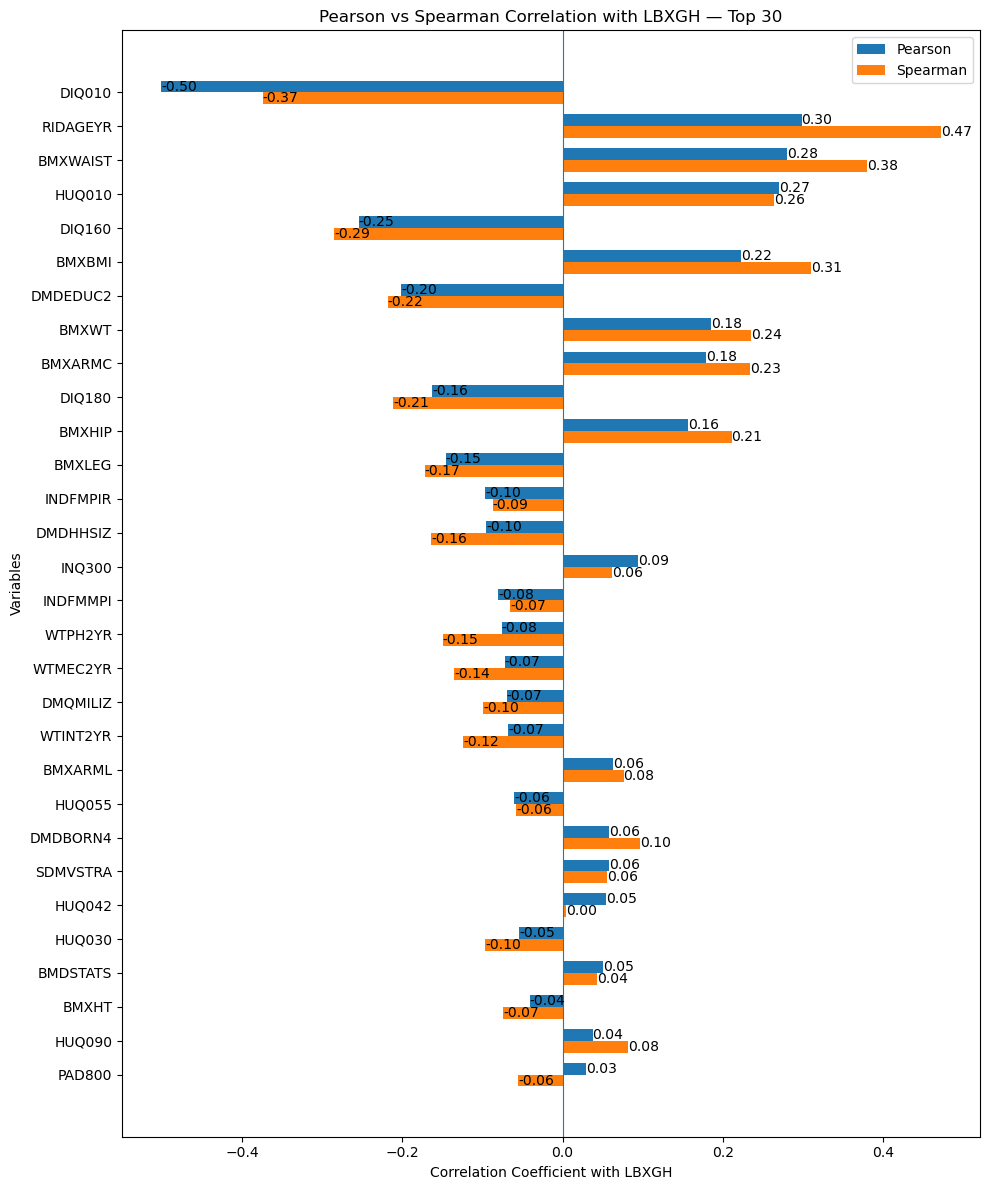

Saved figure to: figures/corr_bar_top30_descending.png


In [17]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import os

# ---------- SETTINGS ----------
LBX = 'LBXGH'
TOP_N = 30
OUT_DIR = 'figures'
os.makedirs(OUT_DIR, exist_ok=True)

if LBX not in df.columns:
    raise ValueError(f"{LBX} not found in dataframe `df`.")

# Keep numeric columns only
numeric_df = df.select_dtypes(include=[np.number]).copy()
numeric_df = numeric_df.dropna(axis=1, how='all')
numeric_df = numeric_df[numeric_df[LBX].notna()]

# ---------- Compute correlations ----------
rows = []
for col in numeric_df.columns:
    if col == LBX:
        continue
    pair = numeric_df[[LBX, col]].dropna()
    if len(pair) < 3:
        continue

    p_r, _ = pearsonr(pair[LBX], pair[col])
    s_r, _ = spearmanr(pair[LBX], pair[col])

    rows.append({
        'variable': col,
        'pearson_r': p_r,
        'spearman_r': s_r,
        'abs_pearson': abs(p_r)
    })

if not rows:
    raise RuntimeError("No valid variables for correlation.")

corr_df = pd.DataFrame(rows)

# ---- Sort in descending order of absolute Pearson ----
corr_df = corr_df.sort_values(by='abs_pearson', ascending=False).reset_index(drop=True)

# Select top N
top_n = min(TOP_N, len(corr_df))
plot_df = corr_df.head(top_n)

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(10, max(4, top_n * 0.4)))

y_pos = np.arange(len(plot_df))
bar_height = 0.35

bars1 = ax.barh(y_pos - bar_height/2,
                plot_df['pearson_r'],
                height=bar_height,
                label='Pearson')

bars2 = ax.barh(y_pos + bar_height/2,
                plot_df['spearman_r'],
                height=bar_height,
                label='Spearman')

ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df['variable'])

# Invert so largest correlation appears at top
ax.invert_yaxis()

ax.set_xlabel(f'Correlation Coefficient with {LBX}')
ax.set_ylabel('Variables')
ax.set_title(f'Pearson vs Spearman Correlation with {LBX} — Top {top_n}')

ax.axvline(0, linewidth=0.8)
ax.legend()

# ---- Add correlation values ----
for bar in bars1:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}',
            va='center')

for bar in bars2:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}',
            va='center')

plt.tight_layout()

fig_path = os.path.join(OUT_DIR, f'corr_bar_top{top_n}_descending.png')
plt.savefig(fig_path, dpi=150)
plt.show()

print(f"Saved figure to: {fig_path}")

In [18]:
# Relevance of each column w.r.t. LBXGH: Pearson & Spearman correlation
target = "LBXGH"
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
# Exclude target itself and ID/design vars that are not meaningful for association
exclude = {target, "SEQN"}
candidates = [c for c in numeric_cols if c not in exclude]

corrs = []
for col in candidates:
    valid = df[[target, col]].dropna(how="any")
    n = len(valid)
    if n < 30:  # skip if too few pairs
        continue
    r_pearson = valid[target].corr(valid[col], method="pearson")
    r_spearman = valid[target].corr(valid[col], method="spearman")
    corrs.append({
        "column": col,
        "n": n,
        "pearson": r_pearson,
        "spearman": r_spearman,
        "abs_pearson": abs(r_pearson),
        "abs_spearman": abs(r_spearman),
    })

corr_df = pd.DataFrame(corrs)
corr_df = corr_df.sort_values("abs_pearson", ascending=False).reset_index(drop=True)
corr_df = corr_df.round(4)
print("Top columns most related to LBXGH (by |Pearson|):")
display(corr_df[["column", "n", "pearson", "spearman", "abs_pearson"]].head(25))

Top columns most related to LBXGH (by |Pearson|):


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


,column,n,pearson,spearman,abs_pearson
0,DIQ010,6714,-0.5016,-0.3745,0.5016
1,RIDAGEYR,6715,0.2984,0.4726,0.2984
2,BMXWAIST,6416,0.2804,0.3806,0.2804
3,HUQ010,6713,0.2700,0.2643,0.2700
4,DIQ160,5655,-0.2547,-0.2851,0.2547
5,BMXBMI,6624,0.2230,0.3101,0.2230
6,DMDEDUC2,5767,-0.2012,-0.2184,0.2012
7,BMXWT,6638,0.1850,0.2354,0.1850
8,BMXARMC,6546,0.1787,0.2336,0.1787
9,DIQ180,5694,-0.1631,-0.2119,0.1631


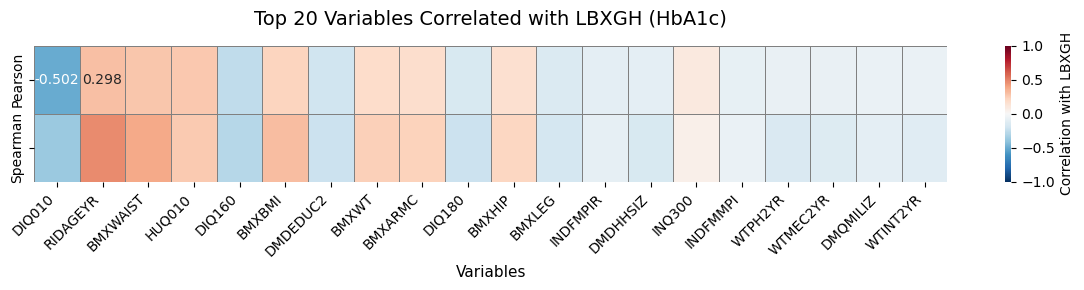


Heatmap shows Pearson (linear) and Spearman (monotonic) correlations.
Red = positive correlation, Blue = negative correlation with LBXGH.


In [19]:
# Visualize correlations with LBXGH as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for heatmap: top N variables
top_n = 20
top_corr = corr_df.head(top_n).copy()

# Create a matrix with Pearson and Spearman side by side
heatmap_data = top_corr[["pearson", "spearman"]].T
heatmap_data.columns = top_corr["column"].values

# Create figure
fig, ax = plt.subplots(figsize=(12, 3))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="RdBu_r",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Correlation with LBXGH"},
    yticklabels=["Pearson", "Spearman"],
    ax=ax,
    linewidths=0.5,
    linecolor="gray"
)
ax.set_title(f"Top {top_n} Variables Correlated with LBXGH (HbA1c)", fontsize=14, pad=15)
ax.set_xlabel("Variables", fontsize=11)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print(f"\nHeatmap shows Pearson (linear) and Spearman (monotonic) correlations.")
print(f"Red = positive correlation, Blue = negative correlation with LBXGH.")

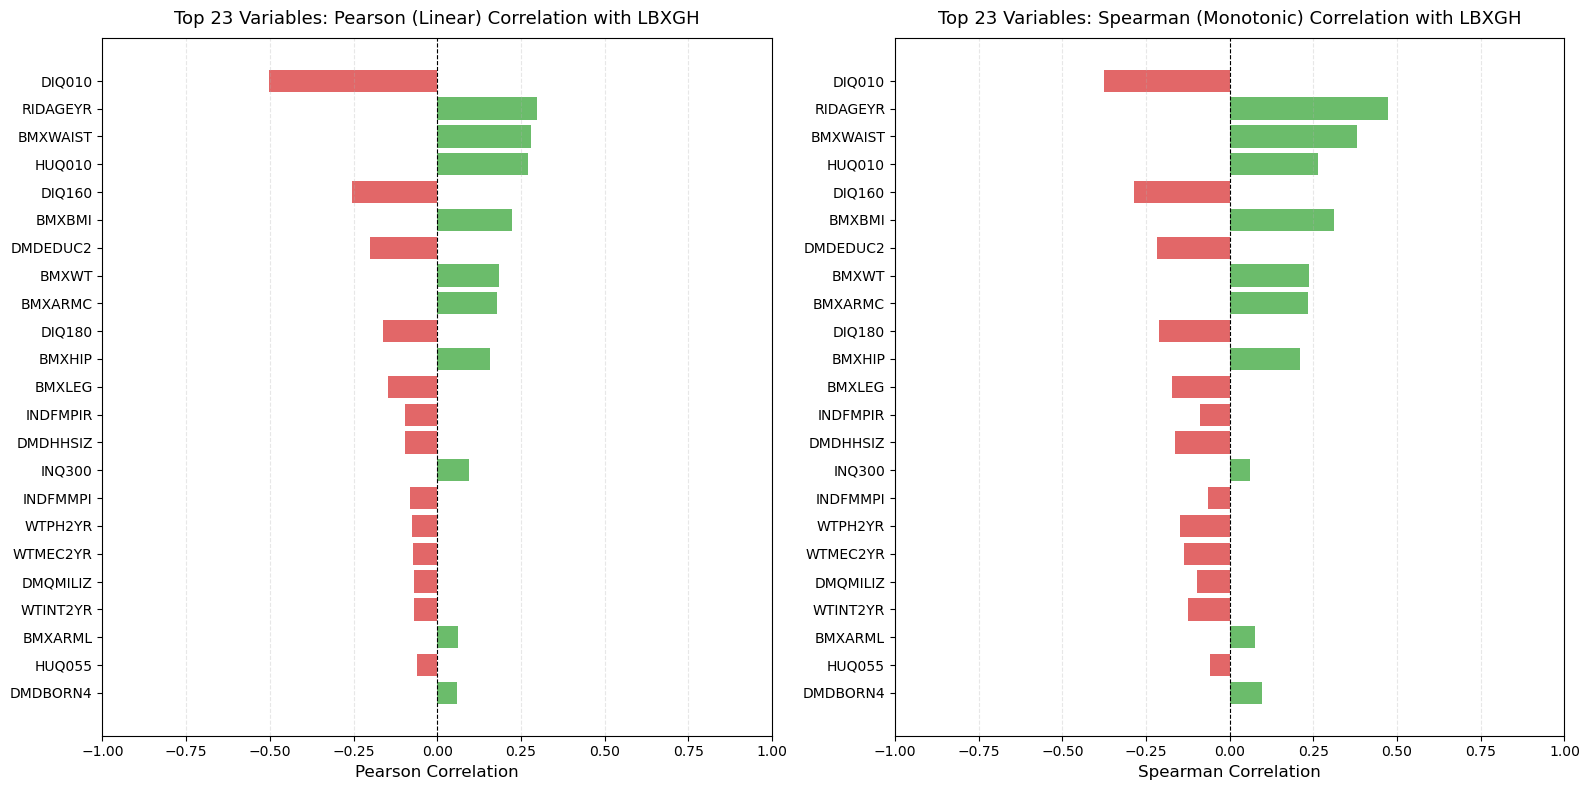

Red bars = Negative correlation, Green bars = Positive correlation


In [20]:
# Alternative: Bar chart visualization of correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top N for visualization
top_n = 23
top_corr_viz = corr_df.head(top_n).copy()

# Sort by absolute Pearson for consistent ordering
top_corr_viz = top_corr_viz.sort_values("abs_pearson", ascending=True)

# Bar chart for Pearson correlation
colors_pearson = ["#2ca02c" if x > 0 else "#d62728" for x in top_corr_viz["pearson"]]
ax1.barh(top_corr_viz["column"], top_corr_viz["pearson"], color=colors_pearson, alpha=0.7)
ax1.axvline(x=0, color="black", linestyle="--", linewidth=0.8)
ax1.set_xlabel("Pearson Correlation", fontsize=12)
ax1.set_title(f"Top {top_n} Variables: Pearson (Linear) Correlation with LBXGH", fontsize=13, pad=10)
ax1.grid(axis="x", alpha=0.3, linestyle="--")
ax1.set_xlim(-1, 1)

# Bar chart for Spearman correlation
colors_spearman = ["#2ca02c" if x > 0 else "#d62728" for x in top_corr_viz["spearman"]]
ax2.barh(top_corr_viz["column"], top_corr_viz["spearman"], color=colors_spearman, alpha=0.7)
ax2.axvline(x=0, color="black", linestyle="--", linewidth=0.8)
ax2.set_xlabel("Spearman Correlation", fontsize=12)
ax2.set_title(f"Top {top_n} Variables: Spearman (Monotonic) Correlation with LBXGH", fontsize=13, pad=10)
ax2.grid(axis="x", alpha=0.3, linestyle="--")
ax2.set_xlim(-1, 1)

plt.tight_layout()
plt.show()

print("Red bars = Negative correlation, Green bars = Positive correlation")

In [21]:
# Brief interpretation: variable meanings (NHANES)
# Top correlates of LBXGH (HbA1c) are typically:
# - LBXGLU / LBDGLUSI: fasting glucose (same lab, different units) — strong positive correlation expected
# - DIQ010: Doctor told you have diabetes (1=Yes, 2=No, 3=Borderline) — strong association
# - RIDAGEYR: Age — often positive (HbA1c tends to rise with age)
# - INDFMPIR: Income-to-poverty ratio — often negative (lower income ↔ higher diabetes risk)
# - DMDEDUC2, DMDMARTZ: Education, marital status — demographic/social determinants
# - DIQ160, DIQ180: Diabetes-related questionnaire items
# - HIQ011, HIQ210: Health insurance
# Variables with |pearson| > 0.3 are usually the most relevant for modeling or stratification.
top_relevant = corr_df.head(15)["column"].tolist()
print("Most relevant columns for LBXGH (use in models or stratification):", top_relevant)

Most relevant columns for LBXGH (use in models or stratification): ['DIQ010', 'RIDAGEYR', 'BMXWAIST', 'HUQ010', 'DIQ160', 'BMXBMI', 'DMDEDUC2', 'BMXWT', 'BMXARMC', 'DIQ180', 'BMXHIP', 'BMXLEG', 'INDFMPIR', 'DMDHHSIZ', 'INQ300']


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


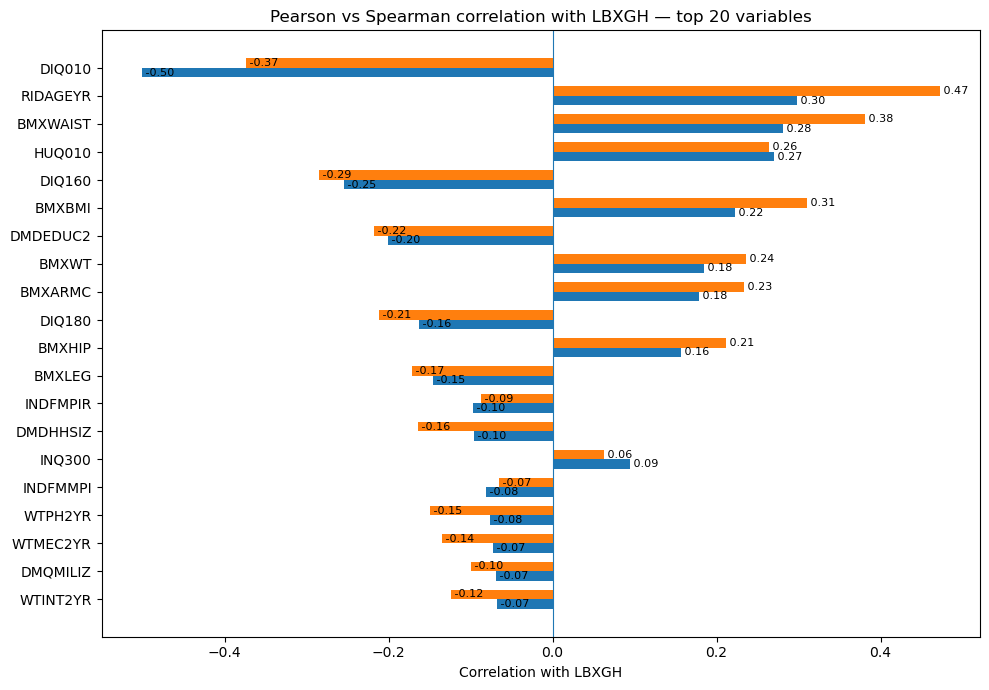

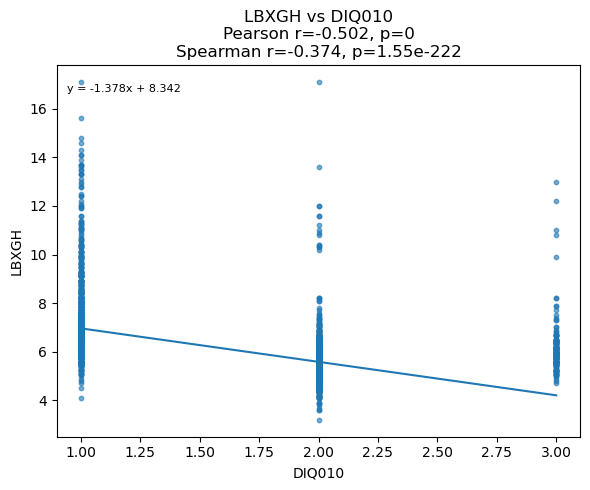

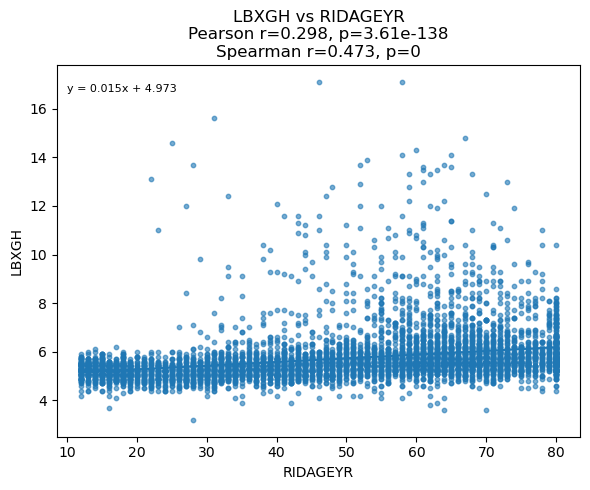

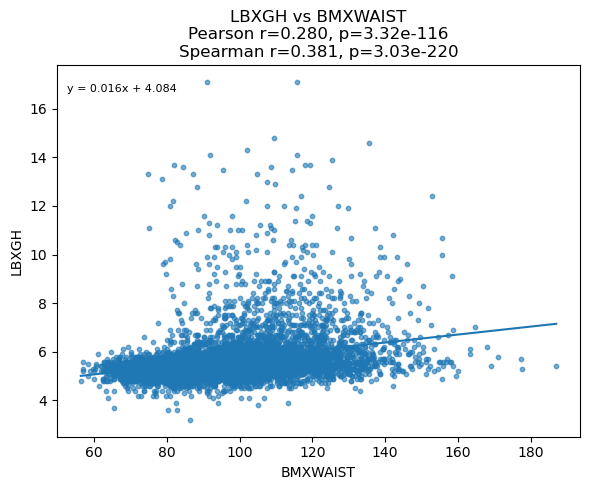

Saved: figures/corr_bar_top20.png
Saved scatter for DIQ010: figures/scatter_DIQ010_vs_LBXGH.png
Saved scatter for RIDAGEYR: figures/scatter_RIDAGEYR_vs_LBXGH.png
Saved scatter for BMXWAIST: figures/scatter_BMXWAIST_vs_LBXGH.png
Correlation table saved to: figures/correlations_with_LBXGH.csv


In [22]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import os

# ---------- SETTINGS ----------
LBX = 'LBXGH'
TOP_N = 20      # how many top variables to display in bar chart
OUT_DIR = 'figures'  # where to save PNGs
os.makedirs(OUT_DIR, exist_ok=True)

# ---------- Sanity checks ----------
if LBX not in df.columns:
    raise ValueError(f"{LBX} not found in dataframe `df`.")

# keep numeric columns only
numeric_df = df.select_dtypes(include=[np.number]).copy()

# drop columns with all-missing
numeric_df = numeric_df.dropna(axis=1, how='all')

# drop rows missing LBX (we need LBX to compute correlations)
numeric_df = numeric_df[numeric_df[LBX].notna()]

# ---------- compute correlations + p-values ----------
rows = []
for col in numeric_df.columns:
    if col == LBX:
        continue
    pair = numeric_df[[LBX, col]].dropna()
    if pair.shape[0] < 3:
        # not enough data to compute correlations reliably
        continue
    p_r, p_p = pearsonr(pair[LBX], pair[col])
    s_r, s_p = spearmanr(pair[LBX], pair[col])
    rows.append({
        'variable': col,
        'pearson_r': p_r,
        'pearson_p': p_p,
        'spearman_r': s_r,
        'spearman_p': s_p,
        'n': pair.shape[0],
        'abs_pearson': abs(p_r)
    })

if len(rows) == 0:
    raise RuntimeError("No variables with enough data to compute correlations.")

corr_df = pd.DataFrame(rows).sort_values('abs_pearson', ascending=False).reset_index(drop=True)

# ---------- Choose top N ----------
top_n = min(TOP_N, len(corr_df))
top_df = corr_df.iloc[:top_n].copy()
top_df = top_df[::-1]  # reverse for nicer horizontal bar ordering (small -> top at top)

# ---------- Figure 1: Horizontal bar chart of Pearson & Spearman ----------
fig1 = plt.figure(figsize=(10, max(4, top_n * 0.35)))
ax1 = fig1.add_subplot(1,1,1)

y_pos = np.arange(len(top_df))
# bars: Pearson and Spearman (signed values)
pear_vals = top_df['pearson_r'].values
spear_vals = top_df['spearman_r'].values
labels = top_df['variable'].values

# bar width and offsets
bar_height = 0.35
ax1.barh(y_pos - bar_height/2, pear_vals, height=bar_height)
ax1.barh(y_pos + bar_height/2, spear_vals, height=bar_height)

ax1.set_yticks(y_pos)
ax1.set_yticklabels(labels)
ax1.axvline(0, linewidth=0.8)  # vertical zero line
ax1.set_xlabel('Correlation with {}'.format(LBX))
ax1.set_title(f'Pearson vs Spearman correlation with {LBX} — top {top_n} variables')

# annotate bars with numeric values
for i, (pr, sr) in enumerate(zip(pear_vals, spear_vals)):
    ax1.text(pr, i - bar_height/2, f" {pr:.2f}", va='center', fontsize=8)
    ax1.text(sr, i + bar_height/2, f" {sr:.2f}", va='center', fontsize=8)

fig1.tight_layout()
fig1_path = os.path.join(OUT_DIR, f'corr_bar_top{top_n}.png')
fig1.savefig(fig1_path, dpi=150)
plt.show()

# ---------- Figures 2..4: scatter + linear fit for top 3 variables ----------
top_k = min(3, len(corr_df))
for i in range(top_k):
    var = corr_df.loc[i, 'variable']
    pair = numeric_df[[LBX, var]].dropna()
    x = pair[var].values
    y = pair[LBX].values

    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x, y, s=10, alpha=0.6)  # scatter points

    # simple linear fit (OLS through polyfit degree=1)
    try:
        coef = np.polyfit(x, y, 1)
        slope, intercept = coef[0], coef[1]
        x_line = np.linspace(np.nanmin(x), np.nanmax(x), 100)
        y_line = slope * x_line + intercept
        ax.plot(x_line, y_line)  # regression line
        eq = f'y = {slope:.3f}x + {intercept:.3f}'
    except Exception:
        eq = 'fit failed'

    ax.set_xlabel(var)
    ax.set_ylabel(LBX)
    ax.set_title(f'{LBX} vs {var}\nPearson r={corr_df.loc[i,"pearson_r"]:.3f}, p={corr_df.loc[i,"pearson_p"]:.3g}\nSpearman r={corr_df.loc[i,"spearman_r"]:.3f}, p={corr_df.loc[i,"spearman_p"]:.3g}')
    ax.grid(False)

    # annotate equation
    ax.text(0.02, 0.95, eq, transform=ax.transAxes, fontsize=8, va='top')

    fig.tight_layout()
    p = os.path.join(OUT_DIR, f'scatter_{var}_vs_{LBX}.png')
    fig.savefig(p, dpi=150)
    plt.show()

# ---------- Save correlation table (CSV) ----------
out_table = os.path.join(OUT_DIR, 'correlations_with_{}.csv'.format(LBX))
corr_df.to_csv(out_table, index=False)

print(f"Saved: {fig1_path}")
for i in range(top_k):
    var = corr_df.loc[i, 'variable']
    print(f"Saved scatter for {var}: {os.path.join(OUT_DIR, f'scatter_{var}_vs_{LBX}.png')}")
print(f"Correlation table saved to: {out_table}")

